(1) Tambahkan link untuk setiap dataset
(2) tambahkan penjelasan pada pra-proses
(3) ganti data posyandu 2019

# Analisis Data Kesehatan Masyarakat Provinsi Jawa Barat

Tanggal Pembuatan Awal : 02 Oktober 2024

Tanggal Perbaikan : 1 Oktober 2023

### Kelompok 1
Alifa Salsabila (2308138)
Muhammad Bintang Eighista (2304137)
Nina Wulandari (2312091)
Putra Aditya Simbolon (2305839)
Yahyo Abdullozoda (2313368)

### Pendahuluan
Dalam rangka memaksimalkan penggunaan fasilitas kesehatan dalam melayani pasien di provinsi Jawa Barat kita menganalisis data dari beberapa kasus penyakit dengan ketersediaan fasilitas kesehatan di provinsi Jawa Barat. Untuk mengetahui hal-hal tersebut, analisis ini menggunakan data dari Dinas Kesehatan untuk mengeksplorasi jumlah fasilitas kesehatan dan hubungannya dengan beberapa penyakit. Dalam konteks ini, beberapa penyakit tersebut yaitu, campak, demam, pneumonia, tetanus, tuberkulosis, diare, malaria, HIV, dan AIDS. Dengan analisis ini, kita bisa mengetahui hubungan suatu kasus penyakit dengan kasus lainnya.

### Pertanyaan
1. Bagaimana tren penyakit tertentu di Provinsi Jawa Barat?
2. Bagaimana hubungan antara kasus penyakit dengan penyakit lainnya?
3. Bagaimana distribusi fasilitas Kesehatan di kabupaten/kota di Provinsi Jawa Barat?
4. Bagaimana perseberan Fasilitas Kesehatan di Kabupaten/Kota di Provinsi Jawa Barat?


# LIBRARY

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from adjustText import adjust_text

# DATASET YANG DIGUNAKAN

In [2]:
populasi = pd.read_csv("content/Datasets/populasi_jabar_2019_2023.csv")

In [3]:
populasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kabupaten/Kota  27 non-null     object 
 1   2019            27 non-null     float64
 2   2020            27 non-null     float64
 3   2021            27 non-null     float64
 4   2022            27 non-null     float64
 5   2023            27 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.4+ KB


In [4]:
populasi.head()

,Kabupaten/Kota,2019,2020,2021,2022,2023
0,Kabupaten Bandung,3775.28,3623.79,3652.40,3687.25,3721.11
1,Kabupaten Bandung Barat,1699.90,1788.34,1808.42,1834.23,1859.64
2,Kabupaten Bekasi,3763.89,3113.02,3148.74,3193.84,3237.42
3,Kabupaten Bogor,5965.41,5427.07,5484.15,5556.31,5627.02
4,Kabupaten Ciamis,1195.18,1229.07,1234.83,1243.32,1251.54


In [5]:
populasi.describe()

,2019,2020,2021,2022,2023
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1826.544815,1787.932593,1805.141852,1826.177778,1846.678889
std,1296.820115,1174.387459,1186.527538,1201.509593,1216.139254
min,183.110000,200.970000,202.720000,205.140000,207.510000
25%,1021.845000,1020.470000,1029.925000,1042.060000,1053.895000
50%,1699.900000,1788.340000,1808.420000,1834.230000,1859.640000
75%,2436.550000,2460.860000,2483.105000,2513.000000,2542.070000
max,5965.410000,5427.070000,5484.150000,5556.310000,5627.020000


In [6]:
populasi.rename(columns = {'Kabupaten/Kota' : 'nama_kabupaten_kota'}, inplace = True)

# Ubah kolom nama_kabupaten_kota menjadi huruf kapital pada dataset populasi
populasi['nama_kabupaten_kota'] = populasi['nama_kabupaten_kota'].str.upper()

# Ubah dataset populasi ke dalam long format
populasi_long = populasi.melt(id_vars=['nama_kabupaten_kota'], 
                              var_name='tahun', 
                              value_name='populasi')

# Ubah kolom 'tahun' pada populasi_long menjadi tipe data integer
populasi_long['tahun'] = populasi_long['tahun'].astype(int)

## Jumlah Fasilitas Kesehatan Berdasarkan Jenis di Jawa Barat

tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-fasilitas-kesehatan-berdasarkan-jenis-di-jawa-barat

In [7]:
faskes = pd.read_csv("content/Datasets/jumlah_fasilitas_kesehatan.csv")

In [8]:
faskes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   810 non-null    int64 
 1   kode_provinsi        810 non-null    int64 
 2   nama_provinsi        810 non-null    object
 3   kode_kabupaten_kota  810 non-null    int64 
 4   nama_kabupaten_kota  810 non-null    object
 5   jenis_faskes         810 non-null    object
 6   jumlah_faskes        810 non-null    int64 
 7   satuan               810 non-null    object
 8   tahun                810 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 57.1+ KB


In [9]:
faskes.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,RUMAH SAKIT UMUM,9,UNIT,2018
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,RUMAH SAKIT KHUSUS,0,UNIT,2018
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,RUMAH SAKIT BERSALIN,0,UNIT,2018
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,PUSKESMAS,62,UNIT,2018
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,POSYANDU,4927,UNIT,2018
5,6,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,RUMAH SAKIT UMUM,7,UNIT,2018
6,7,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,RUMAH SAKIT KHUSUS,0,UNIT,2018
7,8,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,RUMAH SAKIT BERSALIN,0,UNIT,2018
8,9,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,PUSKESMAS,32,UNIT,2018
9,10,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,POSYANDU,3551,UNIT,2018


### Jumlah Kasus Campak di Jawa Barat

tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-penyakit-campak-berdasarkan-kabupatenkota-di-jawa-barat

In [10]:
campak = pd.read_csv('content/Datasets/jml_kasus_penyakit_campak.csv')

In [11]:
# ringkasan isi dari dataframe campak
campak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   162 non-null    int64 
 1   kode_provinsi        162 non-null    int64 
 2   nama_provinsi        162 non-null    object
 3   kode_kabupaten_kota  162 non-null    int64 
 4   nama_kabupaten_kota  162 non-null    object
 5   jumlah_kasus         162 non-null    int64 
 6   satuan               162 non-null    object
 7   tahun                162 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 10.2+ KB


In [12]:
# 10 baris pertama dari dataFrame campak
campak.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,9,ORANG,2018
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,0,ORANG,2018
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,153,ORANG,2018
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,0,ORANG,2018
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,1,ORANG,2018
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,2,ORANG,2018
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,2,ORANG,2018
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,18,ORANG,2018
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,92,ORANG,2018
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,2,ORANG,2018


### Jumlah Kasus HIV di Jawa Barat


tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-hiv-berdasarkan-kabupatenkota-di-jawa-barat

In [13]:
#jumlah kasus penyakit hiv
hiv = pd.read_csv('content/Datasets/jml_kasus_hiv.csv')

In [14]:
# ringkasan isi dari dataframe hiv
hiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   162 non-null    int64 
 1   kode_provinsi        162 non-null    int64 
 2   nama_provinsi        162 non-null    object
 3   kode_kabupaten_kota  162 non-null    int64 
 4   nama_kabupaten_kota  162 non-null    object
 5   jumlah_kasus         162 non-null    int64 
 6   satuan               162 non-null    object
 7   tahun                162 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 10.2+ KB


In [15]:
# 10 baris pertama dari dataFrame hiv
hiv.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,318,ORANG,2018
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,112,ORANG,2018
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,124,ORANG,2018
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,219,ORANG,2018
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,107,ORANG,2018
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,40,ORANG,2018
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,66,ORANG,2018
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,78,ORANG,2018
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,278,ORANG,2018
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,92,ORANG,2018


### Jumlah Kasus Diabetes di Jawa Barat


tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-penderita-diabetes-melitus-berdasarkan-kabupatenkota-di-jawa-barat

In [16]:
#jumlah kasus penyakit diabetes
diabetes = pd.read_csv('content/Datasets/jml_penderita_diabetes_melitus.csv')

In [17]:
# ringkasan isi dari dataframe Diabetes
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   216 non-null    int64 
 1   kode_provinsi        216 non-null    int64 
 2   nama_provinsi        216 non-null    object
 3   kode_kabupaten_kota  216 non-null    int64 
 4   nama_kabupaten_kota  216 non-null    object
 5   jumlah_kasus         216 non-null    int64 
 6   satuan               216 non-null    object
 7   tahun                216 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 13.6+ KB


In [18]:
# 10 baris pertama dari dataFrame Diabetes
diabetes.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,159405,ORANG,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,37369,ORANG,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,41709,ORANG,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,90337,ORANG,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,96111,ORANG,2016
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,25629,ORANG,2016
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,31254,ORANG,2016
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,26554,ORANG,2016
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,74674,ORANG,2016
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,19976,ORANG,2016


### Jumlah Kasus Tuberkulosis di Jawa Barat

tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-penyakit-tuberkulosis-berdasarkan-kabupatenkota-di-jawa-barat

In [19]:
#jumlah kasus penyakit tuberkulosis
tuberkulosis = pd.read_csv('content/Datasets/jml_kasus_penyakit_tuberkulosis.csv')

In [20]:
# ringkasan isi dari dataframe Tuberkulosis
tuberkulosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   216 non-null    int64 
 1   kode_provinsi        216 non-null    int64 
 2   nama_provinsi        216 non-null    object
 3   kode_kabupaten_kota  216 non-null    int64 
 4   nama_kabupaten_kota  216 non-null    object
 5   jumlah_kasus         216 non-null    int64 
 6   satuan               216 non-null    object
 7   tahun                216 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 13.6+ KB


In [21]:
# 10 baris pertama dari dataFrame Tuberkulosis
tuberkulosis.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,8444,ORANG,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,3191,ORANG,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,3010,ORANG,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,5202,ORANG,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,2711,ORANG,2016
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,1683,ORANG,2016
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,1354,ORANG,2016
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,2060,ORANG,2016
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,3172,ORANG,2016
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,1583,ORANG,2016


## Jumlah Kasus Diare di Jawa Barat

tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-penyakit-diare-berdasarkan-kabupatenkota-di-jawa-barat

In [22]:
diare = pd.read_csv("content/Datasets/jml_kasus_penyakit_diare.csv")

In [23]:
diare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   216 non-null    int64 
 1   kode_provinsi        216 non-null    int64 
 2   nama_provinsi        216 non-null    object
 3   kode_kabupaten_kota  216 non-null    int64 
 4   nama_kabupaten_kota  216 non-null    object
 5   jumlah_kasus         216 non-null    int64 
 6   satuan               216 non-null    object
 7   tahun                216 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 13.6+ KB


In [24]:
diare.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,159405,ORANG,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,37369,ORANG,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,41709,ORANG,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,90337,ORANG,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,96111,ORANG,2016
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,25629,ORANG,2016
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,31254,ORANG,2016
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,26554,ORANG,2016
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,74674,ORANG,2016
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,19976,ORANG,2016


### Jumlah Kasus Pneumonia di Jawa Barat

tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-penyakit-pneumonia-berdasarkan-kabupatenkota-di-jawa-barat

In [25]:
#jumlah kasus penyakit pneumonia
pneumonia = pd.read_csv('content/Datasets/jml_kasus_penyakit_pneumonia.csv')

In [26]:
# ringkasan isi dari dataframe Pneumonia
pneumonia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   135 non-null    int64 
 1   kode_provinsi        135 non-null    int64 
 2   nama_provinsi        135 non-null    object
 3   kode_kabupaten_kota  135 non-null    int64 
 4   nama_kabupaten_kota  135 non-null    object
 5   jumlah_kasus         135 non-null    int64 
 6   satuan               135 non-null    object
 7   tahun                135 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 8.6+ KB


In [27]:
# 10 baris pertama dari dataFrame Pneumonia
pneumonia.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,7325,ORANG,2019
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,4906,ORANG,2019
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,4290,ORANG,2019
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,8349,ORANG,2019
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,8374,ORANG,2019
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,3902,ORANG,2019
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,5072,ORANG,2019
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,2277,ORANG,2019
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,10818,ORANG,2019
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,4677,ORANG,2019


### Jumlah Kasus Tetanus di Jawa Barat

tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-penyakit-tetanus-berdasarkan-kabupatenkota-di-jawa-barat

In [28]:
#jumlah kasus penyakit tetanus
tetanus = pd.read_csv('content/Datasets/jml_kasus_penyakit_tetanus.csv')

In [29]:
# ringkasan isi dari dataframe Tetanus
tetanus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   216 non-null    int64 
 1   kode_provinsi        216 non-null    int64 
 2   nama_provinsi        216 non-null    object
 3   kode_kabupaten_kota  216 non-null    int64 
 4   nama_kabupaten_kota  216 non-null    object
 5   jumlah_kasus         216 non-null    int64 
 6   satuan               216 non-null    object
 7   tahun                216 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 13.6+ KB


In [30]:
# 10 baris pertama dari dataFrame Tetanus
tetanus.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,2,ORANG,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,0,ORANG,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,2,ORANG,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,2,ORANG,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,4,ORANG,2016
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,1,ORANG,2016
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,0,ORANG,2016
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,0,ORANG,2016
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,1,ORANG,2016
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,0,ORANG,2016


### Jumlah Kasus Malaria di Jawa Barat

tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-penyakit-malaria-berdasarkan-kabupatenkota-di-jawa-barat

In [31]:
#jumlah kasus penyakit malaria
malaria = pd.read_csv('content/Datasets/jml_kasus_penyakit_malaria.csv')

In [32]:
# ringkasan isi dari dataframe Malaria
malaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   216 non-null    int64 
 1   kode_provinsi        216 non-null    int64 
 2   nama_provinsi        216 non-null    object
 3   kode_kabupaten_kota  216 non-null    int64 
 4   nama_kabupaten_kota  216 non-null    object
 5   jumlah_kasus         216 non-null    int64 
 6   satuan               216 non-null    object
 7   tahun                216 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 13.6+ KB


In [33]:
# 10 baris pertama dari dataFrame Malaria
malaria.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0,ORANG,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,66,ORANG,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,0,ORANG,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,1,ORANG,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,5,ORANG,2016
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,59,ORANG,2016
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,0,ORANG,2016
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,0,ORANG,2016
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,11,ORANG,2016
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,0,ORANG,2016


### Jumlah Kasus Demam Berdarah di Jawa Barat

tautan dataset : https://opendata.jabarprov.go.id/id/dataset/jumlah-kasus-penyakit-demam-berdarah-dengue-dbd-berdasarkan-kabupatenkota-di-jawa-barat

In [34]:
#jumlah kasus penyakit Demam berdarah
demam_berdarah = pd.read_csv('content/Datasets/jml_kasus_penyakit_demam_berdarah.csv')

In [35]:
# ringkasan isi dari dataframe Demam Berdarah
demam_berdarah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   216 non-null    int64 
 1   kode_provinsi        216 non-null    int64 
 2   nama_provinsi        216 non-null    object
 3   kode_kabupaten_kota  216 non-null    int64 
 4   nama_kabupaten_kota  216 non-null    object
 5   jumlah_kasus         216 non-null    int64 
 6   satuan               216 non-null    object
 7   tahun                216 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 13.6+ KB


In [36]:
# 10 baris pertama dari dataFrame Demam Berdarah
demam_berdarah.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,3477,ORANG,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,854,ORANG,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,799,ORANG,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,3466,ORANG,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,561,ORANG,2016
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,478,ORANG,2016
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,748,ORANG,2016
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,1720,ORANG,2016
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,1877,ORANG,2016
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,322,ORANG,2016


# PRA-PROSES

#### Hapus kolom yang tidak diperlukan

Beberapa kolom yang tidak diperlukan dari dataset kami hapus untuk membuat data yang bersih. Dalam hal ini, kami menghapus kolom id, kode_provinsi, nama_provinsi, kode_kabupaten_kota, dan satuan dalam dataset fasilitas kesehatan maupun dataset jumlah kasus penyakit yang mana tidak dibutuhkan untuk proses selanjutnya.

In [37]:
faskes = faskes.drop(columns = ['id','kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota', 'satuan'])
campak = campak.drop(columns = ['kode_provinsi', 'nama_provinsi', 'satuan', 'kode_kabupaten_kota'])
pneumonia = pneumonia.drop(columns = ['kode_provinsi', 'nama_provinsi', 'satuan', 'kode_kabupaten_kota', 'id'])
diare = diare.drop(columns = ['kode_provinsi', 'nama_provinsi', 'satuan', 'kode_kabupaten_kota', 'id'])
hiv = hiv.drop(columns = ['kode_provinsi', 'nama_provinsi', 'satuan', 'kode_kabupaten_kota', 'id'])
demam_berdarah = demam_berdarah.drop(columns = ['kode_provinsi', 'nama_provinsi', 'satuan', 'kode_kabupaten_kota', 'id'])
malaria = malaria.drop(columns = ['kode_provinsi', 'nama_provinsi', 'satuan', 'kode_kabupaten_kota', 'id'])
diabetes = diabetes.drop(columns = ['kode_provinsi', 'nama_provinsi', 'satuan', 'kode_kabupaten_kota', 'id'])
tetanus = tetanus.drop(columns = ['kode_provinsi', 'nama_provinsi', 'satuan', 'kode_kabupaten_kota', 'id'])
tuberkulosis = tuberkulosis.drop(columns = ['kode_provinsi', 'nama_provinsi', 'satuan', 'kode_kabupaten_kota', 'id'])

#### Filter dataset dari tahun 2019 - 2023

Memfilter data berdasarkan rentang tahun, yaitu dari tahun 2019 hingga 2023 atau melakukan operasi pada beberapa Dataset di mana setiap dataset dipotong (subset) agar hanya berisi data dari tahun 2019 hingga 2023. Filter dataset ini dilakukan pada dataset fasilitas kesehatan maupun dataset tiap kasus penyakit.

In [38]:
faskes = faskes[(faskes['tahun'] >= 2019) & (faskes['tahun'] <= 2023)]
campak = campak[(campak['tahun'] >= 2019) & (campak['tahun'] <= 2023)]
diare = diare[(diare['tahun'] >= 2019) & (diare['tahun'] <= 2023)]
pneumonia = pneumonia[(pneumonia['tahun'] >= 2019) & (pneumonia['tahun'] <= 2023)]
hiv = hiv[(hiv['tahun'] >= 2019) & (hiv['tahun'] <= 2023)]
malaria = malaria[(malaria['tahun'] >= 2019) & (malaria['tahun'] <= 2023)]
demam_berdarah = demam_berdarah[(demam_berdarah['tahun'] >= 2019) & (demam_berdarah['tahun'] <= 2023)]
diabetes = diabetes[(diabetes['tahun'] >= 2019) & (diabetes['tahun'] <= 2023)]
tetanus = tetanus[(tetanus['tahun'] >= 2019) & (tetanus['tahun'] <= 2023)]
tuberkulosis = tuberkulosis[(tuberkulosis['tahun'] >= 2019) & (tuberkulosis['tahun'] <= 2023)]

#### Cek nilai kosong

Memeriksa apakah terdapat nilai kosong di dalam setiap dataset, baik dataset fasilitas kesehatan dan dataset tiap penyakit untuk melakukan pembersihan data.

In [39]:
print("Jumlah nilai kosong dataset faskes:")
print(faskes.isnull().sum())

print('-------------------------------------')

print("Jumlah nilai kosong dataset campak:")
print(campak.isnull().sum())

print('-------------------------------------')

print("Jumlah nilai kosong dataset diabetes:")
print(diabetes.isnull().sum())

print('-------------------------------------')

print("Jumlah nilai kosong dataset diare:")
print(diare.isnull().sum())

print('-------------------------------------')

print("Jumlah nilai kosong dataset pneumonia:")
print(pneumonia.isnull().sum())

print('-------------------------------------')

print("Jumlah nilai kosong dataset malaria:")
print(malaria.isnull().sum())

print('-------------------------------------')

print("Jumlah nilai kosong dataset hiv:")
print(hiv.isnull().sum())

print('-------------------------------------')

print("Jumlah nilai kosong dataset tetanus:")
print(tetanus.isnull().sum())

print('-------------------------------------')

print("Jumlah nilai kosong dataset tuberkulosis:")
print(tuberkulosis.isnull().sum())

print('-------------------------------------')

print("Jumlah nilai kosong dataset demam berdarah:")
print(demam_berdarah.isnull().sum())


Jumlah nilai kosong dataset faskes:
nama_kabupaten_kota    0
jenis_faskes           0
jumlah_faskes          0
tahun                  0
dtype: int64
-------------------------------------
Jumlah nilai kosong dataset campak:
id                     0
nama_kabupaten_kota    0
jumlah_kasus           0
tahun                  0
dtype: int64
-------------------------------------
Jumlah nilai kosong dataset diabetes:
nama_kabupaten_kota    0
jumlah_kasus           0
tahun                  0
dtype: int64
-------------------------------------
Jumlah nilai kosong dataset diare:
nama_kabupaten_kota    0
jumlah_kasus           0
tahun                  0
dtype: int64
-------------------------------------
Jumlah nilai kosong dataset pneumonia:
nama_kabupaten_kota    0
jumlah_kasus           0
tahun                  0
dtype: int64
-------------------------------------
Jumlah nilai kosong dataset malaria:
nama_kabupaten_kota    0
jumlah_kasus           0
tahun                  0
dtype: int64
-----------

#### Cek nilai rata-rata, min, max untuk setiap kasus penyakit

#### Campak

In [40]:
campak['jumlah_kasus'].describe()

count     135.000000
mean       83.614815
std       165.326181
min         0.000000
25%         0.000000
50%        15.000000
75%        75.000000
max      1093.000000
Name: jumlah_kasus, dtype: float64

#### Pneumonia

In [41]:
pneumonia['jumlah_kasus'].describe()

count      135.000000
mean      3463.274074
std       2255.695661
min        160.000000
25%       1687.000000
50%       3152.000000
75%       4836.000000
max      11779.000000
Name: jumlah_kasus, dtype: float64

#### Diare

In [42]:
diare['jumlah_kasus'].describe()

count       135.000000
mean      49656.429630
std       34490.992549
min        4944.000000
25%       26120.000000
50%       45897.000000
75%       67695.500000
max      166464.000000
Name: jumlah_kasus, dtype: float64

#### HIV

In [43]:
hiv['jumlah_kasus'].describe()

count     135.000000
mean      239.614815
std       210.163972
min         0.000000
25%        98.000000
50%       186.000000
75%       327.500000
max      1135.000000
Name: jumlah_kasus, dtype: float64

In [44]:
hiv[hiv['nama_kabupaten_kota'] == 'KOTA BANDUNG']

,nama_kabupaten_kota,jumlah_kasus,tahun
47,KOTA BANDUNG,357,2019
74,KOTA BANDUNG,82,2020
101,KOTA BANDUNG,43,2021
128,KOTA BANDUNG,1135,2022
155,KOTA BANDUNG,1059,2023


#### Demam Berdarah

In [45]:
demam_berdarah['jumlah_kasus'].describe()


count     135.000000
mean      956.614815
std       940.632186
min        29.000000
25%       334.500000
50%       651.000000
75%      1283.500000
max      5205.000000
Name: jumlah_kasus, dtype: float64

#### Malaria

In [46]:
malaria['jumlah_kasus'].describe()

count    135.000000
mean      13.111111
std       29.035405
min        0.000000
25%        1.000000
50%        4.000000
75%       11.500000
max      209.000000
Name: jumlah_kasus, dtype: float64

#### Diabetes

In [47]:
diabetes['jumlah_kasus'].describe()

count       135.000000
mean      49656.429630
std       34490.992549
min        4944.000000
25%       26120.000000
50%       45897.000000
75%       67695.500000
max      166464.000000
Name: jumlah_kasus, dtype: float64

#### Tetanus

In [48]:
tetanus['jumlah_kasus'].describe()

count    135.000000
mean       0.103704
std        0.536351
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: jumlah_kasus, dtype: float64

#### Tuberkulosis

In [49]:
tuberkulosis['jumlah_kasus'].describe()

count      135.000000
mean      4823.540741
std       4356.988507
min        269.000000
25%       1790.500000
50%       3446.000000
75%       6058.000000
max      27690.000000
Name: jumlah_kasus, dtype: float64

Setelah melakukan pengecekan terhadap nilai mean, min dan max untuk setiap jumlah kasus penyakit tidak ditemukan nilai yang janggal

### Normalisasi terhadap jumlah penduduk

In [50]:
campak = pd.merge(campak, populasi_long, on=['nama_kabupaten_kota', 'tahun'], how='inner')
campak["jumlah_kasus_per_100000_penduduk"] = (campak['jumlah_kasus'] / (campak['populasi'] * 1000)) *100000

In [51]:
campak

,id,nama_kabupaten_kota,jumlah_kasus,tahun,populasi,jumlah_kasus_per_100000_penduduk
0,28,KABUPATEN BOGOR,5,2019,5965.41,0.083817
1,29,KABUPATEN SUKABUMI,0,2019,2466.27,0.000000
2,30,KABUPATEN CIANJUR,0,2019,2263.07,0.000000
3,31,KABUPATEN BANDUNG,0,2019,3775.28,0.000000
4,32,KABUPATEN GARUT,0,2019,2622.43,0.000000
...,...,...,...,...,...,...
130,158,KOTA BEKASI,331,2023,2627.21,12.598917
131,159,KOTA DEPOK,653,2023,2145.40,30.437215
132,160,KOTA CIMAHI,147,2023,590.78,24.882359
133,161,KOTA TASIKMALAYA,352,2023,741.76,47.454702


In [52]:
pneumonia = pd.merge(pneumonia, populasi_long, on=['nama_kabupaten_kota', 'tahun'], how='inner')
pneumonia["jumlah_kasus_per_100000_penduduk"] = (pneumonia['jumlah_kasus'] / (pneumonia['populasi'] * 1000)) * 100000

In [83]:
pneumonia

,nama_kabupaten_kota,jumlah_kasus,tahun,populasi,jumlah_kasus_per_100000_penduduk
0,KABUPATEN BOGOR,7325,2019,5965.41,122.791225
1,KABUPATEN SUKABUMI,4906,2019,2466.27,198.923881
2,KABUPATEN CIANJUR,4290,2019,2263.07,189.565502
3,KABUPATEN BANDUNG,8349,2019,3775.28,221.149160
4,KABUPATEN GARUT,8374,2019,2622.43,319.322155
...,...,...,...,...,...
130,KOTA BEKASI,2187,2023,2627.21,83.244202
131,KOTA DEPOK,2173,2023,2145.40,101.286473
132,KOTA CIMAHI,4994,2023,590.78,845.323132
133,KOTA TASIKMALAYA,1711,2023,741.76,230.667601


# Pembersihan Dataset Fasilitas Kesehatan

#### RS UMUM

In [54]:
filter_RS_umum = faskes[faskes['jenis_faskes'] == 'RUMAH SAKIT UMUM']
filter_RS_umum['jumlah_faskes'].describe()

count    135.000000
mean      12.029630
std       11.464377
min        0.000000
25%        5.000000
50%        8.000000
75%       16.000000
max       50.000000
Name: jumlah_faskes, dtype: float64

Nilai minimal jumlah RS Umum bernilai 0, hal ini patut untuk diselidiki apakah benar ada daerah yang tidak memiliki RS Umum

In [55]:
filter_RS_umum[filter_RS_umum['jumlah_faskes'] == 0]

,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun
220,KABUPATEN PANGANDARAN,RUMAH SAKIT UMUM,0,2019


In [56]:
filter_RS_umum[filter_RS_umum['nama_kabupaten_kota'] == 'KABUPATEN PANGANDARAN']

,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun
220,KABUPATEN PANGANDARAN,RUMAH SAKIT UMUM,0,2019
355,KABUPATEN PANGANDARAN,RUMAH SAKIT UMUM,1,2020
490,KABUPATEN PANGANDARAN,RUMAH SAKIT UMUM,1,2021
625,KABUPATEN PANGANDARAN,RUMAH SAKIT UMUM,1,2022
760,KABUPATEN PANGANDARAN,RUMAH SAKIT UMUM,1,2023


Data menunjukan pada tahun 2019 Kabupaten Pangandaran tidak memiliki RS Umum. Pada tahun-tahun berikutnya Kabupaten Pangandaran baru memiliki RS Umum. Hal ini dirasa wajar mengingat Kabupaten Pangandara baru terbentuk pada tahun 2012, sehingga fasilitas kesehatan di sana masih tertinggal dengan wilayah lainnya

#### PUSKESMAS

In [57]:
filter_puskesmas = faskes[faskes['jenis_faskes'] == 'PUSKESMAS']
filter_puskesmas['jumlah_faskes'].describe()

count    135.000000
mean      40.637037
std       21.063730
min       10.000000
25%       22.000000
50%       38.000000
75%       50.000000
max      101.000000
Name: jumlah_faskes, dtype: float64

#### POSYANDU

In [58]:
filter_posyandu = faskes[faskes['jenis_faskes'] == 'POSYANDU']
filter_posyandu['jumlah_faskes'].describe()

count     135.000000
mean     1557.881481
std      1379.007717
min         0.000000
25%       373.000000
50%      1436.000000
75%      2369.500000
max      5141.000000
Name: jumlah_faskes, dtype: float64

In [59]:
filter_posyandu[filter_posyandu['jumlah_faskes'] == 0]

,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun
139,KABUPATEN BOGOR,POSYANDU,0,2019
144,KABUPATEN SUKABUMI,POSYANDU,0,2019
149,KABUPATEN CIANJUR,POSYANDU,0,2019
154,KABUPATEN BANDUNG,POSYANDU,0,2019
159,KABUPATEN GARUT,POSYANDU,0,2019
164,KABUPATEN TASIKMALAYA,POSYANDU,0,2019
169,KABUPATEN CIAMIS,POSYANDU,0,2019
174,KABUPATEN KUNINGAN,POSYANDU,0,2019
179,KABUPATEN CIREBON,POSYANDU,0,2019
184,KABUPATEN MAJALENGKA,POSYANDU,0,2019


Terdapat beberapa kota yang tidak memiliki posyandu, hal ini tentunya tidak logis karena posyandu merupakan salah satu fasilitas yang umum dijumpai. Oleh karena itu, dataset tersebut harus diganti.

dataset untuk posyandu diganti dengan dataset baru (https://opendata.jabarprov.go.id/id/dataset/jumlah-pos-pelayanan-terpadu-posyandu-berdasarkan-kabupatenkota-di-jawa-barat)

In [60]:
filter_posyandu = pd.read_csv("content/Datasets/jml_posyandu.csv")

In [61]:
filter_posyandu.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_posyandu,satuan,tahun
0,82,32,JAWA BARAT,3201,KABUPATEN BOGOR,4997,UNIT,2019
1,83,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,3493,UNIT,2019
2,84,32,JAWA BARAT,3203,KABUPATEN CIANJUR,2908,UNIT,2019
3,85,32,JAWA BARAT,3204,KABUPATEN BANDUNG,4299,UNIT,2019
4,86,32,JAWA BARAT,3205,KABUPATEN GARUT,4223,UNIT,2019


In [62]:
filter_posyandu['jumlah_posyandu'].describe()

count     135.000000
mean     1944.703704
std      1266.087764
min       199.000000
25%       981.000000
50%      1698.000000
75%      2556.000000
max      5141.000000
Name: jumlah_posyandu, dtype: float64

sesuaikan format dataset dengan format dataset faskes lainnya

In [63]:
# Drop columns 'id', 'kode_provinsi', and 'satuan'
filter_posyandu.drop(columns=['id','nama_provinsi','kode_kabupaten_kota', 'kode_provinsi', 'satuan'], inplace=True)

# Rename 'jumlah_posyandu' to 'jumlah_faskes'
filter_posyandu.rename(columns={'jumlah_posyandu': 'jumlah_faskes'}, inplace=True)

filter_posyandu['jenis_faskes'] = "POSYANDU"

In [64]:
filter_posyandu.head()

,nama_kabupaten_kota,jumlah_faskes,tahun,jenis_faskes
0,KABUPATEN BOGOR,4997,2019,POSYANDU
1,KABUPATEN SUKABUMI,3493,2019,POSYANDU
2,KABUPATEN CIANJUR,2908,2019,POSYANDU
3,KABUPATEN BANDUNG,4299,2019,POSYANDU
4,KABUPATEN GARUT,4223,2019,POSYANDU


#### RUMAH SAKIT KHUSUS

In [65]:
filter_RS_khusus = faskes[faskes['jenis_faskes'] == 'RUMAH SAKIT KHUSUS']
filter_RS_khusus['jumlah_faskes'].describe()

count    135.000000
mean       2.251852
std        3.048656
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       15.000000
Name: jumlah_faskes, dtype: float64

Dengan meihat nilai max terlihat bahwa terdapat wilayah dengan jumlah RS Khusus yang jauh lebih banyak dari rata-rata jumlah RS Khusus di Jawa Barat. Hal tersebut tentunya harus diselidiki lebih lanjut.

In [66]:
filter_RS_khusus[filter_RS_khusus['jumlah_faskes'] == 15]

,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun
236,KOTA BANDUNG,RUMAH SAKIT KHUSUS,15,2019
371,KOTA BANDUNG,RUMAH SAKIT KHUSUS,15,2020
506,KOTA BANDUNG,RUMAH SAKIT KHUSUS,15,2021
641,KOTA BANDUNG,RUMAH SAKIT KHUSUS,15,2022
776,KOTA BANDUNG,RUMAH SAKIT KHUSUS,15,2023


Terlihat bahwa jumlah rumah sakit khusus di Kota Bandung tidak bertambah maupun berkurang untuk tahun 2019-2023. Jumlah RS Khusus di Kota Bandung yang jauh lebih banyak dari wilayah lain dirasa wajar, karena Kota Bandung ibu kota Jawa Barat dan Kota Bandung merupakan salah satu wilayah yang tergolong maju.

#### RUMAH SAKIT BERSALIN

In [67]:
filter_RS_bersalin = faskes[faskes['jenis_faskes'] == 'RUMAH SAKIT BERSALIN']
filter_RS_bersalin['jumlah_faskes'].describe()

count    135.000000
mean       0.162963
std        1.893459
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       22.000000
Name: jumlah_faskes, dtype: float64

Dengan meihat nilai max terlihat bahwa terdapat wilayah dengan jumlah RS Bersalin yang jauh lebih banyak dari rata-rata jumlah RS Khusus di Jawa Barat. Hal tersebut tentunya harus diselidiki lebih lanjut.

In [68]:
filter_RS_bersalin[filter_RS_bersalin['jumlah_faskes'] == 22]

,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun
322,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,22,2020


In [69]:
filter_RS_bersalin[filter_RS_bersalin['nama_kabupaten_kota'] == 'KABUPATEN SUMEDANG']

,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun
187,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,0,2019
322,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,22,2020
457,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,0,2021
592,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,0,2022
727,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,0,2023


Terdapat data yang tidak logis yang mungkin saja terjadi karena kesalahan input data pada tahun 2020. Kami mengubah jumlah rumah sakit di Kabupaten Sumedang pada tahun 2020 menjadi 0 menyesuaikan dengan nilai jumlah faskes di tahun sebelumnya dan di tahun berikutnya.

In [70]:
filter_RS_bersalin.loc[
    (filter_RS_bersalin['nama_kabupaten_kota'] == 'KABUPATEN SUMEDANG') & (filter_RS_bersalin['tahun'] == 2020),
    'jumlah_faskes'
] = 0

In [71]:
filter_RS_bersalin[filter_RS_bersalin['nama_kabupaten_kota'] == 'KABUPATEN SUMEDANG']

,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun
187,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,0,2019
322,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,0,2020
457,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,0,2021
592,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,0,2022
727,KABUPATEN SUMEDANG,RUMAH SAKIT BERSALIN,0,2023


# Menggabungkan seluruh dataset yang sudah dibersihkan

In [72]:
clean_faskes = pd.concat([filter_RS_umum, filter_RS_khusus, filter_RS_bersalin,filter_posyandu,filter_puskesmas], ignore_index=True)

#### Dataset Jumlah Faskes yang sudah bersih

In [73]:
clean_faskes

,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun
0,KABUPATEN BOGOR,RUMAH SAKIT UMUM,23,2019
1,KABUPATEN SUKABUMI,RUMAH SAKIT UMUM,7,2019
2,KABUPATEN CIANJUR,RUMAH SAKIT UMUM,4,2019
3,KABUPATEN BANDUNG,RUMAH SAKIT UMUM,8,2019
4,KABUPATEN GARUT,RUMAH SAKIT UMUM,6,2019
...,...,...,...,...
670,KOTA BEKASI,PUSKESMAS,48,2023
671,KOTA DEPOK,PUSKESMAS,38,2023
672,KOTA CIMAHI,PUSKESMAS,13,2023
673,KOTA TASIKMALAYA,PUSKESMAS,22,2023


### Normalisasi jumlah faskes dengan jumlah penduduk

In [74]:
populasi

,nama_kabupaten_kota,2019,2020,2021,2022,2023
0,KABUPATEN BANDUNG,3775.28,3623.79,3652.40,3687.25,3721.11
1,KABUPATEN BANDUNG BARAT,1699.90,1788.34,1808.42,1834.23,1859.64
2,KABUPATEN BEKASI,3763.89,3113.02,3148.74,3193.84,3237.42
3,KABUPATEN BOGOR,5965.41,5427.07,5484.15,5556.31,5627.02
4,KABUPATEN CIAMIS,1195.18,1229.07,1234.83,1243.32,1251.54
5,KABUPATEN CIANJUR,2263.07,2477.56,2500.64,2529.81,2558.14
6,KABUPATEN CIREBON,2192.90,2270.62,2301.33,2331.36,2360.44
7,KABUPATEN GARUT,2622.43,2585.61,2613.53,2648.95,2683.67
8,KABUPATEN INDRAMAYU,1728.47,1834.43,1851.73,1873.40,1894.33
9,KABUPATEN KARAWANG,2353.91,2439.09,2465.57,2496.19,2526.00


In [75]:
clean_faskes

,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun
0,KABUPATEN BOGOR,RUMAH SAKIT UMUM,23,2019
1,KABUPATEN SUKABUMI,RUMAH SAKIT UMUM,7,2019
2,KABUPATEN CIANJUR,RUMAH SAKIT UMUM,4,2019
3,KABUPATEN BANDUNG,RUMAH SAKIT UMUM,8,2019
4,KABUPATEN GARUT,RUMAH SAKIT UMUM,6,2019
...,...,...,...,...
670,KOTA BEKASI,PUSKESMAS,48,2023
671,KOTA DEPOK,PUSKESMAS,38,2023
672,KOTA CIMAHI,PUSKESMAS,13,2023
673,KOTA TASIKMALAYA,PUSKESMAS,22,2023


In [76]:
# Gabungkan kedua dataset berdasarkan kolom 'nama_kabupaten_kota' dan 'tahun'
normalisasi_faskes = pd.merge(clean_faskes, populasi_long, on=['nama_kabupaten_kota', 'tahun'], how='inner')

# Tampilkan hasil penggabungan
normalisasi_faskes.head()



,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun,populasi
0,KABUPATEN BOGOR,RUMAH SAKIT UMUM,23,2019,5965.41
1,KABUPATEN BOGOR,RUMAH SAKIT KHUSUS,6,2019,5965.41
2,KABUPATEN BOGOR,RUMAH SAKIT BERSALIN,0,2019,5965.41
3,KABUPATEN BOGOR,POSYANDU,4997,2019,5965.41
4,KABUPATEN BOGOR,PUSKESMAS,101,2019,5965.41


In [77]:
normalisasi_faskes["normalisasi_jumlah_faskes_per_100000_penduduk"] = (normalisasi_faskes['jumlah_faskes'] / (normalisasi_faskes['populasi'] * 1000) * 100000)

In [78]:
normalisasi_faskes

,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,tahun,populasi,normalisasi_jumlah_faskes_per_100000_penduduk
0,KABUPATEN BOGOR,RUMAH SAKIT UMUM,23,2019,5965.41,0.385556
1,KABUPATEN BOGOR,RUMAH SAKIT KHUSUS,6,2019,5965.41,0.100580
2,KABUPATEN BOGOR,RUMAH SAKIT BERSALIN,0,2019,5965.41,0.000000
3,KABUPATEN BOGOR,POSYANDU,4997,2019,5965.41,83.766246
4,KABUPATEN BOGOR,PUSKESMAS,101,2019,5965.41,1.693094
...,...,...,...,...,...,...
670,KOTA BANJAR,RUMAH SAKIT UMUM,2,2023,207.51,0.963809
671,KOTA BANJAR,RUMAH SAKIT KHUSUS,0,2023,207.51,0.000000
672,KOTA BANJAR,RUMAH SAKIT BERSALIN,0,2023,207.51,0.000000
673,KOTA BANJAR,POSYANDU,200,2023,207.51,96.380897


# PROSEDUR VISUALISASI DATA

In [79]:
def show_plot_faskes(jenis_faskes) :
    # Filter dataset untuk jenis faskes Rumah Sakit Umum
    df = normalisasi_faskes[normalisasi_faskes['jenis_faskes'] == jenis_faskes]

    # Membuat plot
    plt.figure(figsize=(20, 10))
    sns.set_style("whitegrid")

    # Membuat barplot dengan warna sesuai tahun
    palette = {
        2019: 'red', 
        2020: 'orange', 
        2021: 'yellow', 
        2022: 'green', 
        2023: 'blue'
    }
    
    sns.barplot(
        
        data=df, 
        x='nama_kabupaten_kota', 
        y= 'normalisasi_jumlah_faskes_per_100000_penduduk', 
        hue='tahun', 
        palette=palette
    )

    # Mempercantik tampilan
    plt.title(f'Persebaran Fasilitas Kesehatan {jenis_faskes} per 100.000 penduduk di Jawa Barat per Tahun (2019-2023)', pad=20)
    plt.xlabel('Kabupaten/Kota')
    plt.ylabel('Jumlah Fasilitas Kesehatan')

    # Merotasi label x agar terbaca
    plt.xticks(rotation=45, ha='right')

    # Mengatur legend
    plt.legend(title='Tahun', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Mengatur layout agar tidak terpotong
    plt.tight_layout()

    # Menampilkan plot
    plt.show()


In [80]:
def show_map_faskes(jenis_faskes, tahun):
    """
    Memvisualisasikan persebaran fasilitas kesehatan di Jawa Barat
    dengan label yang tidak tumpang tindih
    
    Parameters:
    -----------
    jenis_faskes : str
        Jenis fasilitas kesehatan (e.g., 'PUSKESMAS', 'RUMAH SAKIT UMUM', etc.)
    tahun : int
        Tahun data yang akan divisualisasikan
    """
    # 1. Membaca dan mempersiapkan data
    gdf_jabar = gpd.read_file('RBI_50K_2023_Jawa Barat.x26272\RBI_50K_2023_Jawa Barat.shp')
    gdf_jabar = gdf_jabar.to_crs(epsg=3857)
    
    # 2. Filter data normalisasi berdasarkan jenis faskes dan tahun
    filtered_data = normalisasi_faskes[
        (normalisasi_faskes['jenis_faskes'] == jenis_faskes) & 
        (normalisasi_faskes['tahun'] == tahun)
    ]
    
    # 3. Membuat dictionary untuk mapping nilai
    normalisasi_dict = {}
    for idx, row in filtered_data.iterrows():
        nama = row['nama_kabupaten_kota'].replace('KABUPATEN ', '')
        normalisasi_dict[nama.upper()] = row['normalisasi_jumlah_faskes_per_100000_penduduk']
    
    # 4. Menambahkan kolom normalisasi ke GeoDataFrame
    gdf_jabar['normalisasi'] = gdf_jabar['kabu_kota'].map(normalisasi_dict)
    
    # 5. Membuat plot
    fig, ax = plt.subplots(figsize=(15, 15))
    
    # 6. Plot choropleth
    vmin = gdf_jabar['normalisasi'].min()
    vmax = gdf_jabar['normalisasi'].max()
    cmap = plt.cm.RdYlGn  # Red-Yellow-Green colormap
    
    gdf_jabar.plot(column='normalisasi', 
                   ax=ax,
                   cmap=cmap,
                   legend=True,
                   legend_kwds={'label': f'Jumlah {jenis_faskes} per 100.000 Penduduk',
                               'orientation': 'vertical'},
                   missing_kwds={'color': 'lightgrey'},
                   edgecolor='black',
                   linewidth=0.5)
    
    # 7. Menambahkan basemap
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
    
    # 8. Menyiapkan texts untuk adjustText
    texts = []
    for idx, row in gdf_jabar.iterrows():
        if not pd.isna(row['normalisasi']):
            # Membuat text object
            text = plt.text(row.geometry.centroid.x,
                          row.geometry.centroid.y,
                          f"{row['kabu_kota']}\n{row['normalisasi']:.2f}",
                          ha='center',
                          va='center',
                          fontsize=8,
                          bbox=dict(facecolor='white',
                                  alpha=0.7,
                                  edgecolor='none',
                                  boxstyle='round,pad=0.5'))
            texts.append(text)
    
    # 9. Menggunakan adjustText untuk menghindari overlap
    adjust_text(texts,
               expand_points=(1.2, 1.2),
               expand_text=(1.1, 1.1),
               force_points=(0.5, 0.5),
               force_text=(0.5, 0.5),
               arrowprops=dict(arrowstyle='-',
                             color='gray',
                             alpha=0.5,
                             lw=0.5))
    
    # 10. Menyesuaikan tampilan
    plt.title(f'Persebaran {jenis_faskes} per 100.000 Penduduk\ndi Jawa Barat ({tahun})', 
              pad=20, 
              size=14)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Cara penggunaan:
# show_map_faskes('PUSKESMAS', 2019)

# Visualisasi Data

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


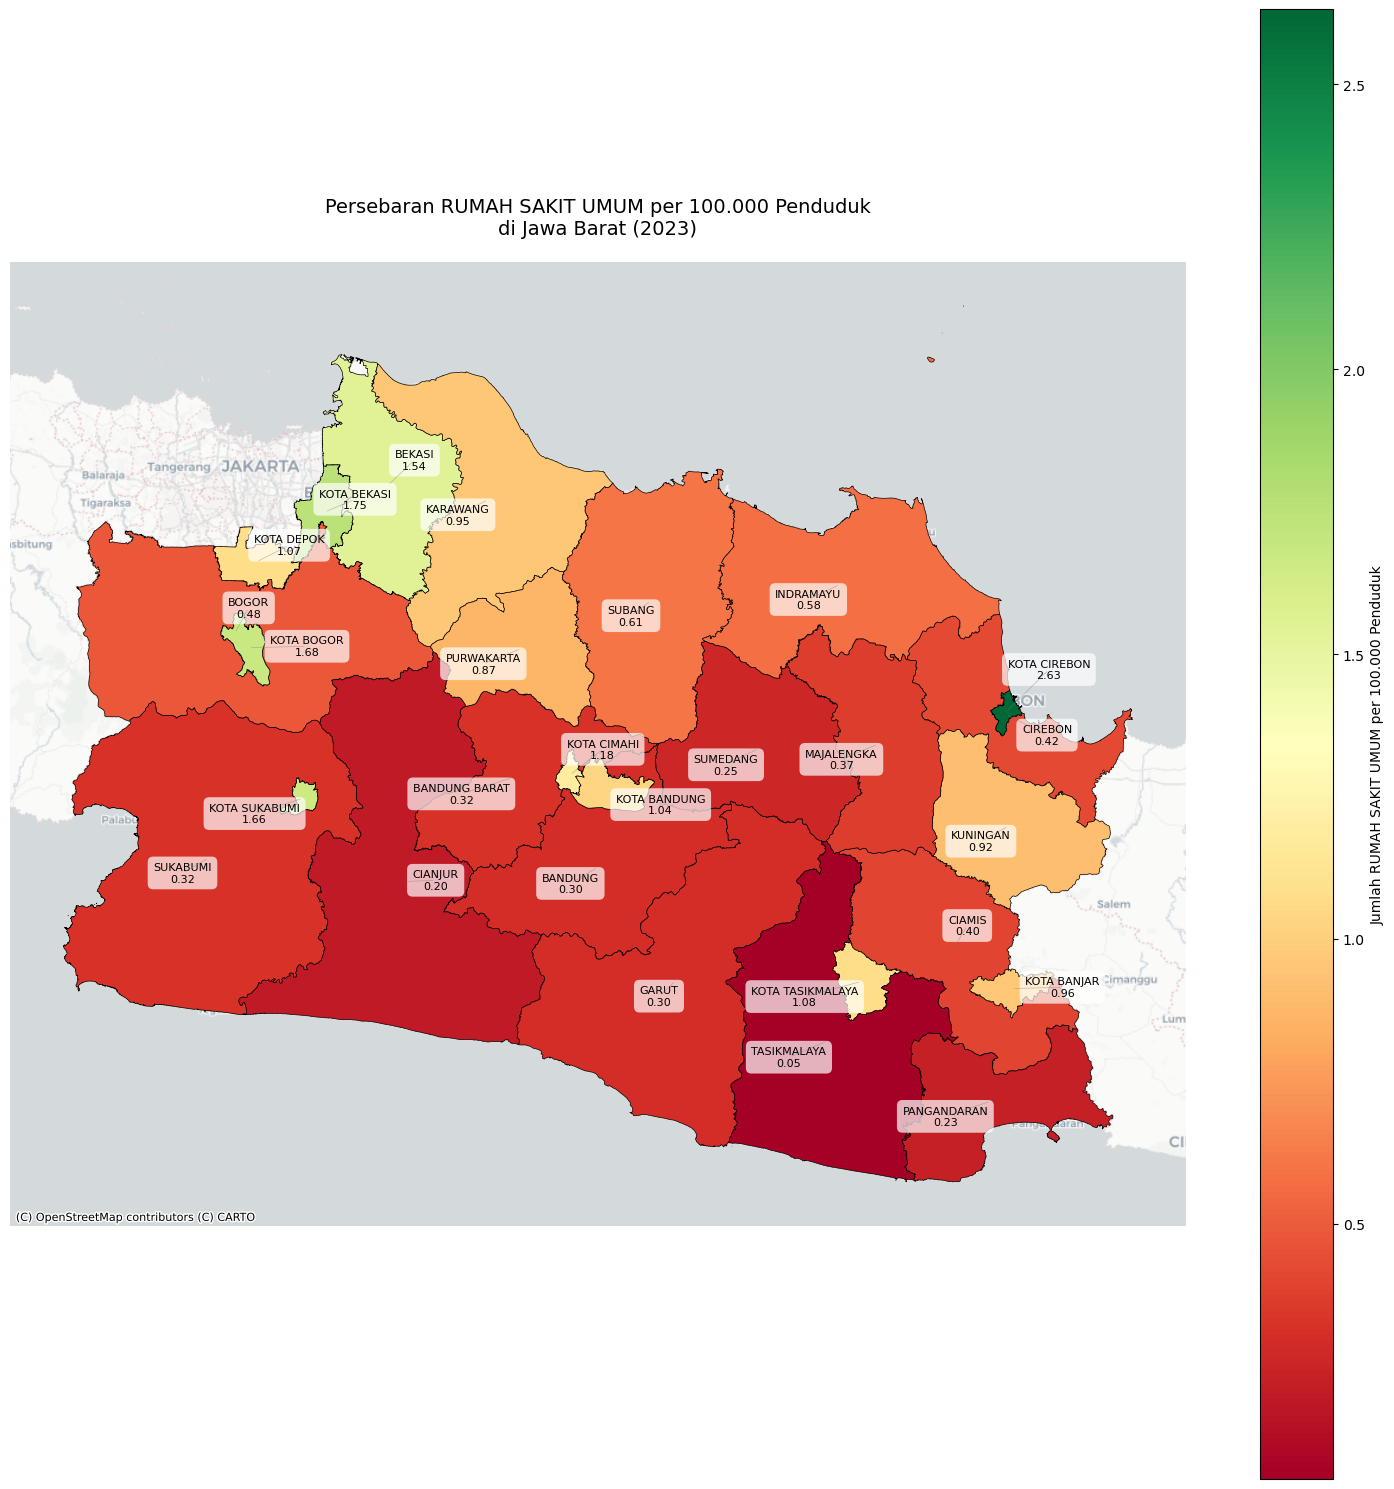

In [81]:
show_map_faskes('RUMAH SAKIT UMUM', 2023)

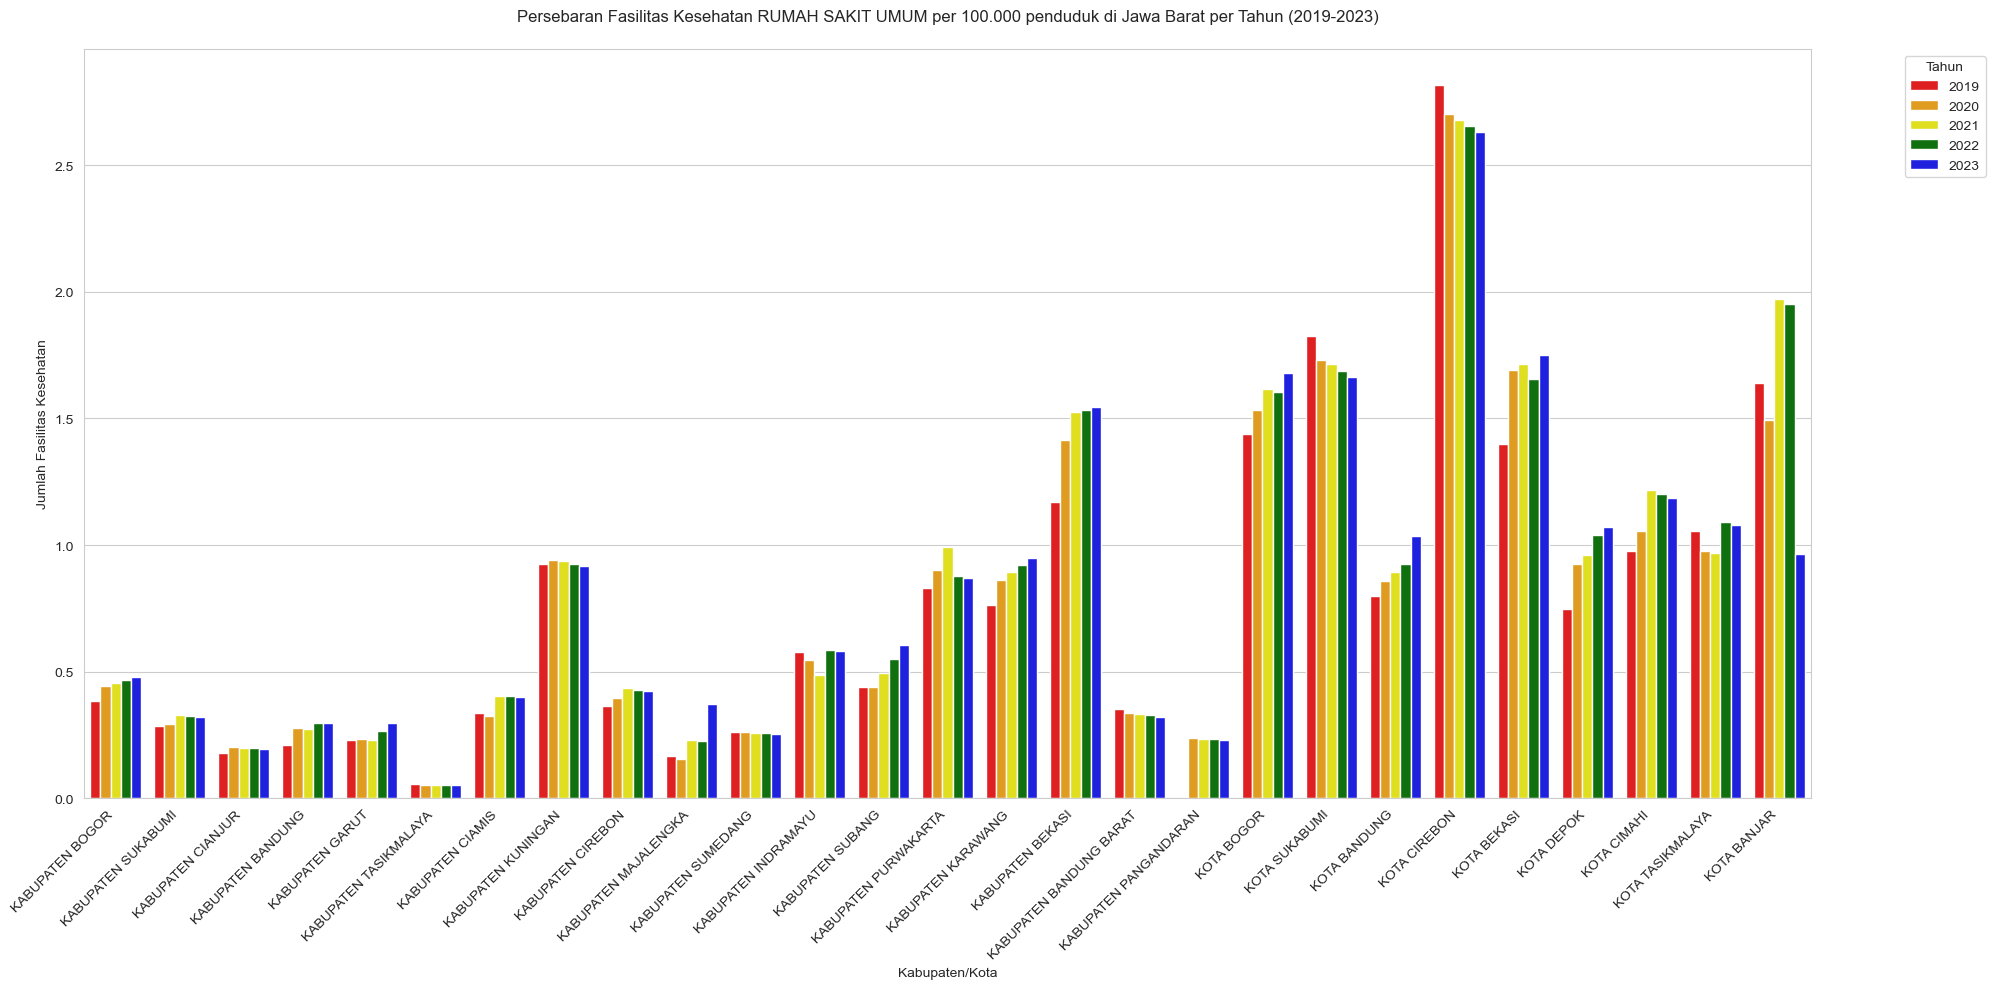

In [82]:
show_plot_faskes("RUMAH SAKIT UMUM")